In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

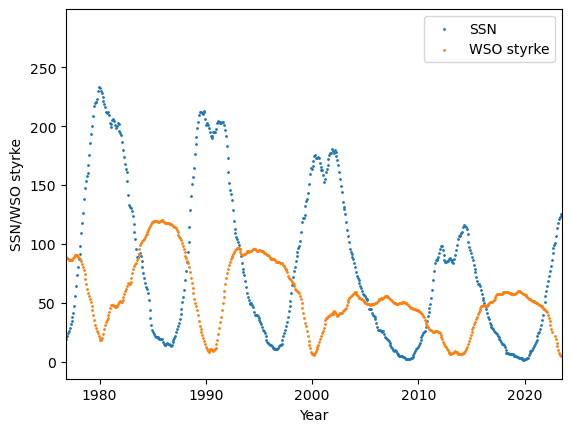

In [56]:
# Indlæs data

loc1 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\13-month smoothed monthly total sunspot number 1-1749 to now.csv"
loc2 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\WSO_smoothed.csv"

column_names = ['Year', 'Year_fraction', 'Monthly_smoothed_sunspot_number', 'U1', 'U2', 'U3']
sunspot_raw_data = pd.read_csv(loc1, names=column_names, delimiter=';')
sunspot_raw_data = sunspot_raw_data.iloc[6:-6]

# Sunspot data
sunspot_date_fraction_arr = sunspot_raw_data['Year_fraction'].values.astype(float)
sunspot_number_arr = sunspot_raw_data['Monthly_smoothed_sunspot_number'].values.astype(float)

# WSO data
wso_raw_data = np.genfromtxt(loc2, delimiter=',', skip_header=1)

wso_date_fraction_arr = wso_raw_data[:, 0]
wso_number_arr = wso_raw_data[:, 1]

# Størrelse på punkterne i scatterplottet
ScatterSize = 1

# Plot data
plt.scatter(sunspot_date_fraction_arr, sunspot_number_arr, label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr, wso_number_arr, label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()

## Korrelationskoefficient over hele tidsrummet med WSO-data

### Normalisering med [min-max normalisering](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization))

In [57]:
# Normaliser data med min-max normalisering til at være mellem 0 og 1
def min_max_normalization(data, a, b):
    return [a + (val - np.min(data))*(b - a) / (np.max(data) - np.min(data)) for val in data]

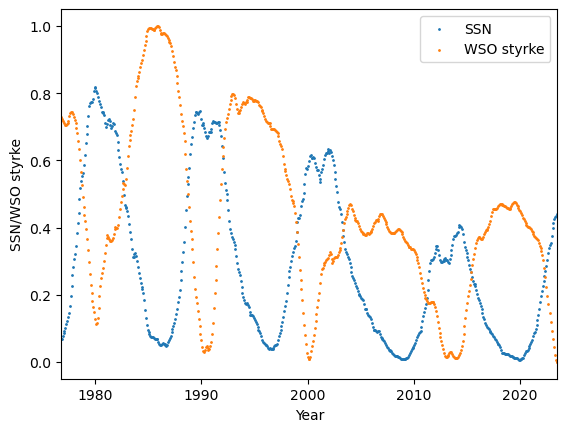

In [58]:
sunspot_number_arr_normalized = min_max_normalization(sunspot_number_arr, 0, 1)
wso_number_arr_normalized = min_max_normalization(wso_number_arr, 0, 1)

# Plot
plt.scatter(sunspot_date_fraction_arr, sunspot_number_arr_normalized, label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr, wso_number_arr_normalized, label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()


In [59]:
# Returnerer korrelationskoefficienten for to arrays
def correlation_coefficient(x_arr, y_arr):
    return np.cov(x_arr, y_arr)[0,1] / (np.std(x_arr) * np.std(y_arr))

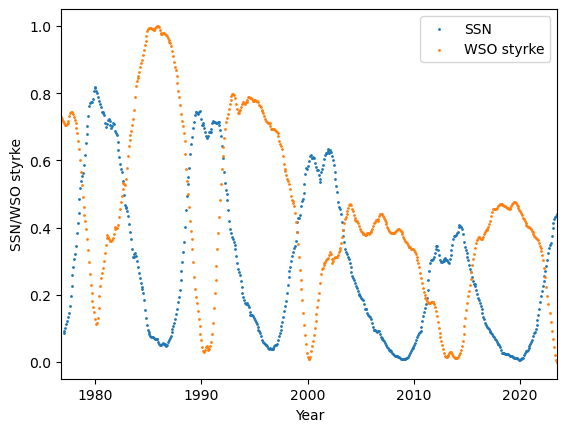

Korrelationskoefficienten mellem SSN og WSO styrke er: -0.45665121082247534


In [60]:
# Udregn korrelationskoefficienten
# Skær arrays til så de har samme længde
min_length = min(len(sunspot_number_arr_normalized), len(wso_number_arr_normalized))

# Plot
plt.scatter(sunspot_date_fraction_arr[-min_length:], sunspot_number_arr_normalized[-min_length:], label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr[-min_length:], wso_number_arr_normalized[-min_length:], label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()

corr_coeff = correlation_coefficient(sunspot_number_arr_normalized[-min_length:], wso_number_arr_normalized[-min_length:])
print('Korrelationskoefficienten mellem SSN og WSO styrke er:', corr_coeff)


### Opdeling af cykler

In [61]:
# Split cykler op i 5 arrays
division_proxy = [wso_date_fraction_arr[0], 1986.5, 1996.5, 2009, 2020, wso_date_fraction_arr[-1]]

wso_cycles = []
SSN_cycles = []
# Loop igennem opdelingsdatoerne
for i in range(1, len(division_proxy)):
    current_division_date = division_proxy[i]
    previous_division_date = division_proxy[i-1]
    
    current_wso_cycle = []
    current_SSN_cycle = []

    # Loop igennem alle datoer og tilføj data til den nuværende cyklus hvis de er indenfor intervallet
    for date in wso_date_fraction_arr:
        if date >= previous_division_date and date < current_division_date:
            current_wso_cycle.append([date, wso_number_arr[-min_length:][np.where(wso_date_fraction_arr == date)[0][0]]])
            current_SSN_cycle.append([date, sunspot_number_arr[-min_length:][np.where(wso_date_fraction_arr == date)[0][0]]])

    wso_cycles.append(current_wso_cycle)
    SSN_cycles.append(current_SSN_cycle)



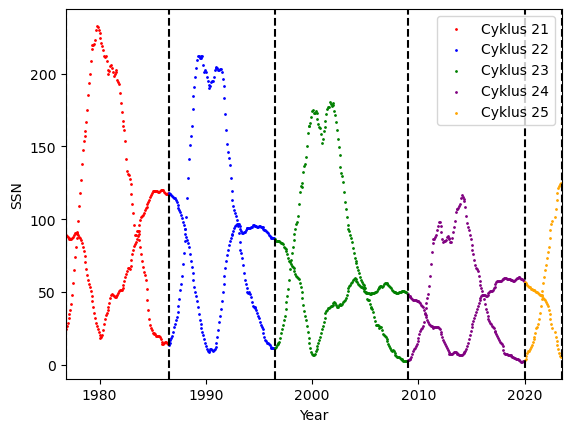

In [62]:
# Plot cykler hver for sig   
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(len(wso_cycles)):
    current_wso_cycle = wso_cycles[i]
    current_SSN_cycle = SSN_cycles[i]
    plt.scatter([x[0] for x in current_wso_cycle], [x[1] for x in current_wso_cycle], label='Cyklus 2{}'.format(i + 1), s=ScatterSize, color=colors[i])
    plt.xlabel('Year')
    plt.ylabel('WSO styrke')
    plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
    plt.legend()

    plt.scatter([x[0] for x in current_SSN_cycle], [x[1] for x in current_SSN_cycle], s=ScatterSize, color=colors[i])
    plt.xlabel('Year')
    plt.ylabel('SSN')
    plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
    plt.legend()

# Plot linjer for opdeling af cykler
for x in division_proxy:
    plt.axvline(x, color='black', linestyle='dashed')

plt.show()

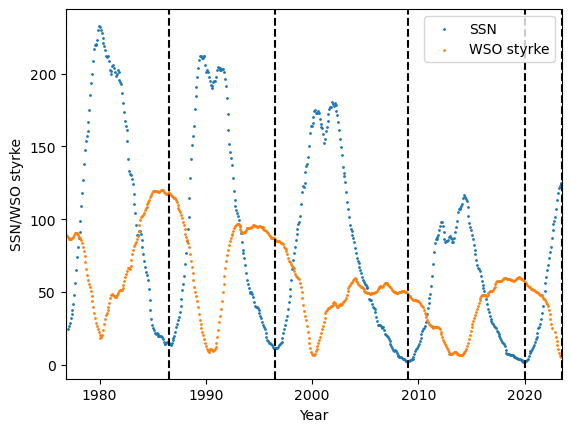

In [63]:
# Plot cykler samlet
for x in division_proxy:
    plt.axvline(x, color='black', linestyle='dashed')

plt.scatter(sunspot_date_fraction_arr[-min_length:], sunspot_number_arr[-min_length:], label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr[-min_length:], wso_number_arr[-min_length:], label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()



### Korrelationskoefficient

In [64]:
normalized_wso_cycles = []
normalized_SSN_cycles = []
for i in range(len(wso_cycles)):
    current_wso_cycle_normalized = min_max_normalization([x[1] for x in wso_cycles[i]], 0, 1)
    current_SSN_cycle_normalized = min_max_normalization([x[1] for x in SSN_cycles[i]], 0, 1)
    
    current_normalized_wso_cycle = []
    current_normalized_SSN_cycle = []

    for j in range(len(wso_cycles[i])):
        current_normalized_wso_cycle.append([wso_cycles[i][j][0], current_wso_cycle_normalized[j]])
        current_normalized_SSN_cycle.append([SSN_cycles[i][j][0], current_SSN_cycle_normalized[j]])
    
    normalized_wso_cycles.append(current_normalized_wso_cycle)
    normalized_SSN_cycles.append(current_normalized_SSN_cycle)


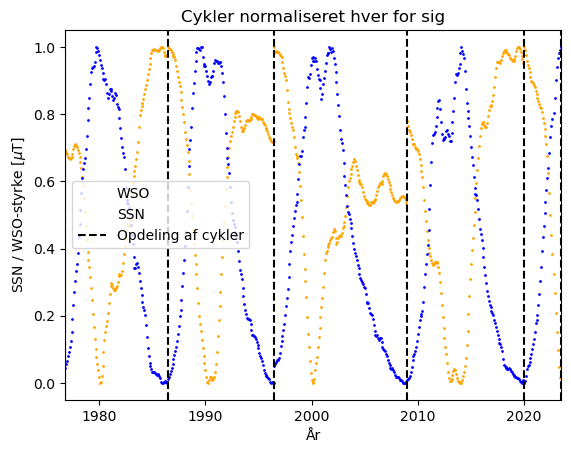

In [67]:
# Plot cykler hver for sig   
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(len(wso_cycles)):
    current_wso_cycle = normalized_wso_cycles[i]
    current_SSN_cycle = normalized_SSN_cycles[i]
    plt.scatter([x[0] for x in current_wso_cycle], [x[1] for x in current_wso_cycle], s=ScatterSize, color="orange")
    plt.xlabel('År')
    plt.ylabel(r'SSN / WSO-styrke [$\mu$T]')
    plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])

    plt.scatter([x[0] for x in current_SSN_cycle], [x[1] for x in current_SSN_cycle], s=ScatterSize, color="blue")
    plt.xlabel('År')
    plt.ylabel(r'SSN / WSO-styrke [$\mu$T]')
    plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])

# Plot linjer for opdeling af cykler
for x in division_proxy:
    plt.axvline(x, color='black', linestyle='dashed')

plt.title('Cykler normaliseret hver for sig')

# Legend
plt.scatter([1], [1], label="WSO", s=ScatterSize, marker='none', color="orange")
plt.scatter([1], [1], label="SSN", s=ScatterSize, marker='none', color="blue")
plt.axvline(1, color='black', linestyle='dashed', visible="False", label='Opdeling af cykler')
plt.legend()

plt.show()

### Korrelation for hver enkelt cyklus

In [66]:
correlations = []

for i in range(len(wso_cycles)):
    current_wso_cycle = normalized_wso_cycles[i]
    current_SSN_cycle = normalized_SSN_cycles[i]

    coerr_coeff = correlation_coefficient([x[1] for x in current_wso_cycle], [x[1] for x in current_SSN_cycle])
    correlations.append(coerr_coeff)

# Print korrelationskoefficienter
print("Korrelationskoefficienter for hver enkelt cyklus:")
for i in range(len(correlations)):
    print('ρ_{} = {}'.format(i + 1, correlations[i])) 

print()
print("Korrelationskoefficienten for alle cyklusser samlet:")
print('ρ =', correlation_coefficient(sunspot_number_arr_normalized[-min_length:], wso_number_arr_normalized[-min_length:]))

    

Korrelationskoefficienter for hver enkelt cyklus:
ρ_1 = -0.9661679544716446
ρ_2 = -0.8862880504948891
ρ_3 = -0.6933796910083534
ρ_4 = -0.9400382818258826
ρ_5 = -0.9775861349910571

Korrelationskoefficienten for alle cyklusser samlet:
ρ = -0.45665121082247534
